In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid",  font_scale=1.2)
plt.rcParams["font.family"]  =  "SimHei"
plt.rcParams["axes.unicode_minus"]  =  False

In [121]:
#读取数据
news=pd.read_csv('./news.csv')
#查看数据维度
print(news.shape)
#查看数据
display(news.head())

(20738, 4)


,date,tag,headline,content
0,2016-01-01,详细全文,陆军领导机构火箭军战略支援部队成立大会在京举行 习近平向中国人民解放军陆军火箭军战略支援部队...,中国人民解放军陆军领导机构、中国人民解放军火箭军、中国人民解放军战略支援部队成立大会2015...
1,2016-01-01,详细全文,中央军委印发《关于深化国防和军队改革的意见》,经中央军委主席习近平批准，中央军委近日印发了《关于深化国防和军队改革的意见》。\n《意见》强...
2,2016-01-01,详细全文,《习近平关于严明党的纪律和规矩论述摘编》出版发行,由中共中央纪律检查委员会、中共中央文献研究室编辑的《习近平关于严明党的纪律和规矩论述摘编》一...
3,2016-01-01,详细全文,以实际行动向党中央看齐 向高标准努力,广大党员干部正在积极学习习近平总书记在中央政治局专题民主生活会上的重要讲话。大家纷纷表示要把...
4,2016-01-01,详细全文,【年终特稿】关键之年 改革挺进深水区,刚刚过去的2015年，是全面深化改革的关键之年。改革集中发力在制约经济社会发展的深层次矛盾，...


In [122]:
#缺失值处理
news.isnull().sum()

date          0
tag           0
headline      0
content     107
dtype: int64

In [123]:
#获取content字段缺失值索引
index_null=news[news['content'].isnull()].index
#用标题填充content字段中缺失值
news['content'][index_null]=news['headline'][index_null]
#重新查卡缺失值
news.isnull().sum()

date        0
tag         0
headline    0
content     0
dtype: int64

In [124]:
#查看数据
news.loc[index_null].sample(5)

,date,tag,headline,content
3568,2016-07-13,详细全文,【健康扶贫在基层】健康保障兜底 扶贫精准发力,【健康扶贫在基层】健康保障兜底 扶贫精准发力
13288,2017-10-24,详细全文,中国共产党第十九届中央纪律检查委员会委员名单,中国共产党第十九届中央纪律检查委员会委员名单
944,2016-02-26,详细全文,二十国集团财长和央行行长会议在上海举行,二十国集团财长和央行行长会议在上海举行
10321,2017-06-06,国内,三只旅日大熊猫昨晚抵达成都,三只旅日大熊猫昨晚抵达成都
13196,2017-10-19,详细全文,十九大代表分组讨论：新时代·新思想·新目标·新征程,十九大代表分组讨论：新时代·新思想·新目标·新征程


In [125]:
#输出重复数
print(news.duplicated().sum())
#查看重复数据
display(news[news.duplicated()])

5


,date,tag,headline,content
13280,2017-10-24,详细全文,中国共产党第十九届中央委员会委员名单,中国共产党第十九届中央委员会委员名单
13284,2017-10-24,详细全文,中国共产党第十九届中央委员会候补委员名单,中国共产党第十九届中央委员会候补委员名单
13288,2017-10-24,详细全文,中国共产党第十九届中央纪律检查委员会委员名单,中国共产党第十九届中央纪律检查委员会委员名单
13305,2017-10-25,详细全文,中国共产党第十九届中央委员会第一次全体会议公报,中国共产党第十九届中央委员会第一次全体会议公报
13325,2017-10-25,详细全文,中国共产党第十九届中央纪律检查委员会第一次全体会议公报,中国共产党第十九届中央纪律检查委员会第一次全体会议公报


In [126]:
#删除重复值
news.drop_duplicates(inplace=True)
#查看重复值
news.duplicated().sum()

0

In [127]:
news['content']

0        中国人民解放军陆军领导机构、中国人民解放军火箭军、中国人民解放军战略支援部队成立大会2015...
1        经中央军委主席习近平批准，中央军委近日印发了《关于深化国防和军队改革的意见》。\n《意见》强...
2        由中共中央纪律检查委员会、中共中央文献研究室编辑的《习近平关于严明党的纪律和规矩论述摘编》一...
3        广大党员干部正在积极学习习近平总书记在中央政治局专题民主生活会上的重要讲话。大家纷纷表示要把...
4        刚刚过去的2015年，是全面深化改革的关键之年。改革集中发力在制约经济社会发展的深层次矛盾，...
                               ...                        
20733    土耳其官方媒体日前报道说，根据俄土达成的在叙利亚伊德利卜“建立非军事区”的协议，叙利亚反政府...
20734    国际货币基金组织北京时间今天发布报告宣布，将今明两年世界经济增速预期下调至3.7%，比此前7...
20735    9日，乌克兰切尔尼戈夫地区一座军火库发生爆炸。事发地位于乌克兰首都基辅东部约176公里处，事...
20736    联合国政府间气候变化专门委员会8日发布“全球升温1.5℃特别报告”。报告显示，如果气候变暖以...
20737    国际奥委会第133次全会8日批准塞内加尔获得2022年第四届夏季青年奥运会的举办权。而在现代...
Name: content, Length: 20733, dtype: object

In [128]:
#文本内容清洗

import re

#设置模式
pattern = r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~—！，。？、￥…（）：【】《》‘’“”\s]+"
#编译模式
re_obj=re.compile(pattern)
#设置处理文本函数
def clear_text(text):
    return re_obj.sub('',text)

#应用函数清理文本
news['content']=news['content'].apply(clear_text)
news['content'].sample(5)

16028    由十三届全国人大一次会议预备会议选举产生的大会主席团4日上午在人民大会堂举行第一次会议会议应...
16074    中共中央政治局常委国务院总理李克强6日上午来到他所在的十三届全国人大一次会议广西代表团参加审...
11655    10日意大利北部多地发生暴雨大风等强对流天气据安莎社报道在威尼托大区的波尔托格鲁阿罗耶索洛等...
19462    昨天傍晚精彩的日偏食天象在我国多地上演这是今年我国能观测到的唯一一次日食天象这次日偏食在我国...
4680     G20杭州峰会就推动世界经济增长达成杭州共识习近平主席在峰会期间的重要讲话为构建创新活力联动...
Name: content, dtype: object

In [129]:
#分词

import jieba

def cut_word(text):
    #返回生成器
    return jieba.cut(text)
#进行分词
news['content']=news['content'].apply(cut_word)
#查看数据
news['content'].sample(5)

5589     <generator object Tokenizer.cut at 0x000001B68...
4654     <generator object Tokenizer.cut at 0x000001B68...
9886     <generator object Tokenizer.cut at 0x000001B68...
476      <generator object Tokenizer.cut at 0x000001B68...
17457    <generator object Tokenizer.cut at 0x000001B68...
Name: content, dtype: object

In [130]:
def get_stopword():
    s=set()
    #打开文件
    with open('stopword.txt',encoding='utf8') as f:
        for line in f:
            s.add(line)
    return s

#删除停用词
def remove_stopord(words):
    return [word for word in words if words not in stopwords and len(word)>1]

#获取停用词
stopwords=get_stopword()
#去除停用词
news['content']=news['content'].apply(remove_stopord)
news['content']

0        [中国人民解放军, 陆军, 领导, 机构, 中国人民解放军, 火箭, 中国人民解放军, 战略...
1        [中央军委, 主席, 习近平, 批准, 中央军委, 近日, 印发, 关于, 深化, 国防, ...
2        [中共中央纪律检查委员会, 中共中央文献研究室, 编辑, 习近平, 关于, 严明, 党的纪律...
3        [广大党员, 干部, 正在, 积极, 学习, 习近平, 总书记, 中央政治局, 专题, 民主...
4        [刚刚, 过去, 2015, 全面, 深化改革, 关键, 改革, 集中, 发力, 制约, 经...
                               ...                        
20733    [土耳其, 官方, 媒体, 日前, 报道, 根据, 俄土, 达成, 叙利亚, 德利, 建立,...
20734    [国际货币基金组织, 北京, 时间, 今天, 发布, 报告, 宣布, 今明两年, 世界, 经...
20735    [乌克兰, 切尔尼戈夫, 地区, 一座, 军火库, 发生爆炸, 事发, 位于, 乌克兰, 首...
20736    [联合国, 政府, 气候变化, 专门, 委员会, 发布, 全球, 升温, 15, 特别, 报...
20737    [国际奥委会, 133, 全会, 批准, 塞内加尔, 获得, 2022, 第四届, 夏季, ...
Name: content, Length: 20733, dtype: object

In [131]:
from itertools import chain
from collections import Counter

#转换为2维列表
li_2d=news['content'].tolist()
#转换为1维列表
li_1d=list(chain(*li_2d))
li_1d

['中国人民解放军',
 '陆军',
 '领导',
 '机构',
 '中国人民解放军',
 '火箭',
 '中国人民解放军',
 '战略',
 '支援',
 '部队',
 '成立',
 '大会',
 '2015',
 '12',
 '31',
 '八一',
 '大楼',
 '隆重举行',
 '中共中央',
 '总书记',
 '国家',
 '主席',
 '中央军委',
 '主席',
 '习近平',
 '陆军',
 '火箭',
 '战略',
 '支援',
 '部队',
 '授予',
 '军旗',
 '并致',
 '训词',
 '代表',
 '党中央',
 '中央军委',
 '同志',
 '全军',
 '部队',
 '致以',
 '热烈祝贺',
 '强调',
 '坚持',
 '以党',
 '新形势下',
 '强军',
 '目标',
 '引领',
 '深入',
 '贯彻',
 '新形势下',
 '军事',
 '战略方针',
 '全面实施',
 '改革',
 '强军',
 '战略',
 '坚定不移',
 '中国',
 '特色',
 '强军',
 '时刻',
 '听从',
 '党和人民',
 '召唤',
 '忠实',
 '履行',
 '党和人民',
 '赋予',
 '神圣',
 '使命',
 '实现',
 '中国',
 '强军',
 '作出',
 '贡献',
 '下午',
 '成立',
 '大会',
 '开始',
 '全场',
 '唱国歌',
 '仪仗',
 '礼兵',
 '护卫',
 '鲜艳',
 '军旗',
 '步行',
 '主席台',
 '习近平',
 '将军',
 '郑重',
 '授予',
 '陆军',
 '司令员',
 '作成',
 '政治委员',
 '刘雷',
 '火箭',
 '司令员',
 '魏凤',
 '政治委员',
 '王家',
 '战略',
 '支援',
 '部队',
 '司令员',
 '高津',
 '政治委员',
 '刘福',
 '陆军',
 '火箭',
 '战略',
 '支援',
 '部队',
 '主要',
 '领导',
 '军容严整',
 '精神抖擞',
 '习近平',
 '敬礼',
 '习近平',
 '手中',
 '接过',
 '军旗',
 '全场',
 '官兵',
 '军旗',
 '敬礼',
 '授旗仪式',
 '习近平',
 '训词',
 '指出

In [132]:
print('总词汇量%d'%len(li_1d))
#计数
c=Counter(li_1d)
#输出词频最高的15个词语
common=c.most_common(15)
#输出结果
print(common)

总词汇量2361714
[('发展', 20414), ('中国', 18784), ('习近平', 13424), ('合作', 12320), ('国家', 10881), ('工作', 9328), ('建设', 8331), ('表示', 7350), ('经济', 7239), ('主席', 6786), ('推动', 6271), ('问题', 6257), ('全面', 6155), ('加强', 6149), ('推进', 6053)]


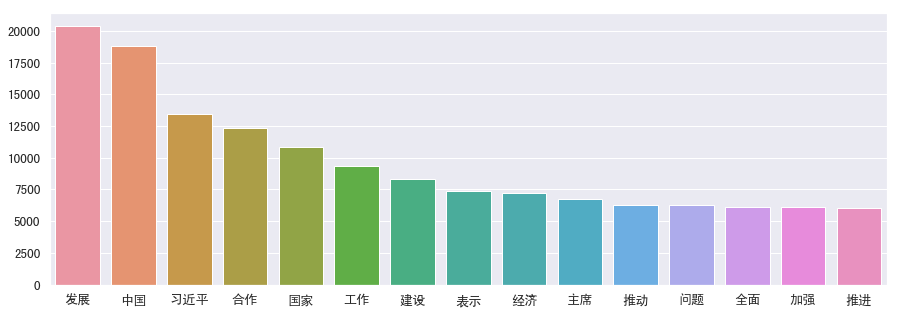

In [133]:
#转换为字典
d=dict(common)
#初始化画布
plt.figure(figsize=(15,5))
#绘制柱状图
sns.barplot(list(d.keys()),list(d.values()))

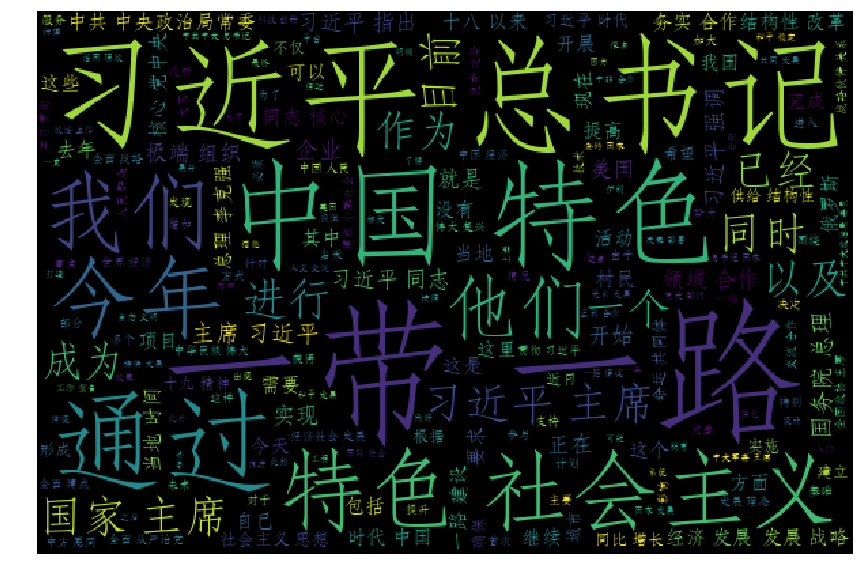

In [134]:
from wordcloud import WordCloud

#初始化对象
wc=WordCloud(font_path=r'C:/Windows/Fonts/STFANGSO.ttf',
             width=600,
             height=400)
li_2d=news['content'].tolist()
li_1d=list(chain(*li_2d))
#拼接文本
join_words=' '.join(li_1d)
#生成图片
img=wc.generate(join_words)
#初始化画布
plt.figure(figsize=(15,10))
#显示图片
plt.imshow(img)
#关闭坐标轴
plt.axis('off')
#存储图片
wc.to_file('wordcloud.png')

开始加载文本


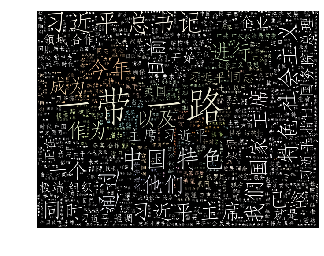

In [135]:
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator

#打开图片
backgroud_Image=np.array(Image.open('map.jpg'))
#初始化词云图对象
wc=WordCloud(
    background_color='black',# 设置背景颜色
    mask=backgroud_Image,# 设置背景图片
    font_path=r'C:/Windows/Fonts/STFANGSO.ttf',  # 若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
    max_words=2000, # 设置最大现实的字数
    max_font_size=150,# 设置字体最大值
    random_state=30# 设置有多少种随机生成状态，即有多少种配色方案
)
#生成文本
wc.generate_from_text(join_words)
print('开始加载文本')
#改变字体颜色
img_colors = ImageColorGenerator(backgroud_Image)
#字体颜色为背景图片的颜色
wc.recolor(color_func=img_colors)
#显示词云图
plt.imshow(wc)
#是否显示x轴、y轴下标
plt.axis('off')
#显示图形
plt.show()

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化对象
cv=CountVectorizer()
#文档
docs=['cat fish pandas','fish snake beer','cat cat beer']
#转换文档
cv_docs=cv.fit_transform(docs)
#获取每个特征对应的单词
print(cv.get_feature_names())
#输出单词与编号的映射关系。
print(cv.vocabulary_)

['beer', 'cat', 'fish', 'pandas', 'snake']
{'cat': 1, 'fish': 2, 'pandas': 3, 'snake': 4, 'beer': 0}


In [137]:
#cv_docs是一个稀疏的矩阵。
print('稀疏矩阵为:',cv_docs)
#调用稀疏矩阵的toarray方法，将稀疏矩阵转换为ndarray对象（稠密矩阵）
print('稠密矩阵为:',cv_docs.toarray())

稀疏矩阵为:   (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 2)	1
  (1, 4)	1
  (1, 0)	1
  (2, 1)	2
  (2, 0)	1
稠密矩阵为: [[0 1 1 1 0]
 [1 0 1 0 1]
 [1 2 0 0 0]]


In [138]:
#测试文档
test_docs=['cat beer tiger','cow rabbit cat']
#转换文档
t=cv.transform(test_docs)
#发现文本中没有的内容比如tiger，该模型无法体现
print(t.toarray())

[[1 1 0 0 0]
 [0 1 0 0 0]]


In [139]:
from  sklearn.feature_extraction.text  import  TfidfVectorizer

#文档
docs=['cat fish pandas','fish snake beer','cat cat beer']
#初始化对象
tfidf=TfidfVectorizer()
#对文档进行转换
t=tfidf.fit_transform(docs)
#输出结果
print(t.toarray())

[[0.         0.51785612 0.51785612 0.68091856 0.        ]
 [0.51785612 0.         0.51785612 0.         0.68091856]
 [0.4472136  0.89442719 0.         0.         0.        ]]


In [140]:
# -*- coding: utf-8 -*-
from collections import defaultdict
import math
import operator
 
"""
函数说明:创建数据样本
Returns:
    dataset - 实验样本切分的词条
    classVec - 类别标签向量
"""
def loadDataSet():
#     dataset = [ ['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],    # 切分的词条
#                    ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
#                    ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
#                    ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
#                    ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
#                    ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid'] ]
    dataset=[['cat','fish','pandas'],['fish', 'snake', 'beer'],['cat', 'cat' ,'beer']]
    classVec = [0, 1, 0, 1, 0, 1]  # 类别标签向量，1代表好，0代表不好
    return dataset, classVec
 
 
"""
函数说明：特征选择TF-IDF算法
Parameters:
     list_words:词列表
Returns:
     dict_feature_select:特征选择词字典
"""
def feature_select(list_words):
    #总词频统计
    doc_frequency=defaultdict(int)
    for word_list in list_words:
        for i in word_list:
            doc_frequency[i]+=1
 
    #计算每个词的TF值
    word_tf={}  #存储没个词的tf值
    for i in doc_frequency:
        word_tf[i]=doc_frequency[i]/sum(doc_frequency.values())
 
    #计算每个词的IDF值
    doc_num=len(list_words)
    word_idf={} #存储每个词的idf值
    word_doc=defaultdict(int) #存储包含该词的文档数
    for i in doc_frequency:
        for j in list_words:
            if i in j:
                word_doc[i]+=1
    for i in doc_frequency:
        word_idf[i]=math.log(doc_num/(word_doc[i]+1))
 
    #计算每个词的TF*IDF的值
    word_tf_idf={}
    for i in doc_frequency:
        word_tf_idf[i]=word_tf[i]*word_idf[i]
 
    # 对字典按值由大到小排序
    dict_feature_select=sorted(word_tf_idf.items(),key=operator.itemgetter(1),reverse=True)
    return dict_feature_select
 
if __name__=='__main__':
    data_list,label_list=loadDataSet() #加载数据
    features=feature_select(data_list) #所有词的TF-IDF值
    print(features)
    print(len(features))

[('pandas', 0.04505167867868493), ('snake', 0.04505167867868493), ('cat', 0.0), ('fish', 0.0), ('beer', 0.0)]
5


In [141]:
def join(text_list):
    #返回用空格连接的字符串
    return ' '.join(text_list)

#应用该函数到content字段
news['content']=news['content'].apply(join)
#查看数据
news.sample(5)

,date,tag,headline,content
20144,2018-09-10,详细全文,8月全国居民消费价格同比上涨2.3%,国家统计局 今天 公布 数据 显示 月份 全国 居民消费 价格 同比 上涨 23 涨幅 比上...
15270,2018-01-24,国内,达沃斯论坛聚焦国际合作应对挑战,48 世界 经济 论坛 年会 23 瑞士 小镇 达沃斯 开幕 瑞士联邦 主席 阿兰 贝尔 开...
5402,2016-10-16,详细全文,各地举办“世界粮食日”宣传活动,今天 36 世界 粮食 各地 围绕 积极 应对 气候变化 促进 粮食 减损 增效 这个 主题...
19971,2018-09-03,详细全文,电视剧《远方的家》今晚开播,34 电视剧 远方 今晚 央视 综合 频道 黄金档 开播 该剧 生动 刻画 跟随 子女 异乡...
2072,2016-04-25,详细全文,习近平就政法队伍建设作出重要指示强调 坚持把思想政治建设摆在第一位 努力建设信念坚定执法为民...,中共中央 总书记 国家 主席 中央军委 主席 习近平 近日 政法队伍 建设 作出 重要 指示...


In [142]:
#对tag转换为离散值
news["tag"]  =  news["tag"].map({"详细全文":  0,  "国内":0,  "国际":  1})
#统计类别值
news["tag"].value_counts()

0    17715
1     3018
Name: tag, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split
#属性值
X=news['content']
#标签值
y=news['tag']
#分离数据
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print('训练集样本数：',y_train.shape[0],'测试样本数：',y_test.shape[0])

训练集样本数： 15549 测试样本数： 5184


In [152]:
#特征选择

vec=TfidfVectorizer(ngram_range=(1,2))
X_train_tran=vec.fit_transform(x_train)
X_test_tran=vec.transform(x_test)
display(x_train_tran,x_test_tran)

<15549x999635 sparse matrix of type '<class 'numpy.float64'>'
	with 2931532 stored elements in Compressed Sparse Row format>

<5184x999635 sparse matrix of type '<class 'numpy.float64'>'
	with 719615 stored elements in Compressed Sparse Row format>

In [154]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#根据y进行分组，计算X中每个特征F值与P值
#F值越大，P值越小
f_classif(X_train_tran,y_train)
#转换为32为浮点数表示
X_train_tran=X_train_tran.astype(np.float32)
X_test_tran=X_test_tran.astype(np.float32)
#定义特征选择器，用来选择最好的K个特征
selector=SelectKBest(f_classif,
                     k=min(20000,X_train_tran.shape[1]))
selector.fit(X_train_tran,y_train)
#对训练集和测试集进行转换（选择特征）
X_train_tran=selector.transform(X_train_tran)
X_test_tran=selector.transform(X_test_tran)
print(X_train_tran.shape,X_test_tran.shape)

(15549, 20000) (5184, 20000)


In [156]:
y_test.shape

(5184,)

In [160]:
from  sklearn.linear_model  import  LogisticRegression
from  sklearn.model_selection  import  GridSearchCV
from  sklearn.metrics  import  classification_report

#设置参数
param  =  [{"penalty":  ["l1", "l2",  ],  
            "C":  [0.1,  1,  10],
            "solver":  ["liblinear"]
           },
          {"penalty":  ["elasticnet"],  
           "C":  [0.1,  1,  10],
          "solver":  ["saga"],  
           "l1_ratio":  [0.5]
          }
          ]
#网格搜索寻找最佳参数
gs  =  GridSearchCV(estimator=LogisticRegression(),  
                    param_grid=param,
                    cv=2, 
                    scoring="f1", 
                    n_jobs=-1,  
                    verbose=0)
gs.fit(X_train_tran,  y_train)
#输出最好参数
print(gs.best_params_)
#获取最佳参数预测测试集
y_hat  =  gs.best_estimator_.predict(X_test_tran)
print(y_hat.shape)
#输出
print(classification_report(y_test,  y_hat))

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
(5184,)
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4414
           1       0.73      0.61      0.67       770

    accuracy                           0.91      5184
   macro avg       0.83      0.79      0.81      5184
weighted avg       0.90      0.91      0.91      5184

